# Data Analyst Associate Practical Exam Submission
By [Rahmatuel Samuel](https://rahmatuelsamuel.com/)

>You can run this notebook, by clicking the hamburger button beside the title then click runtime -> run all -> run anyways

### Company Background
Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast food
establishments, customers make claims against the company. For example, they blame
Vivendo for suspected food poisoning.

The legal team, who processes these claims, is currently split across four locations. The new
head of the legal department wants to see if there are differences in the time it takes to close
claims across the locations.

### Customer Question
The legal team has given you a data set where each row is a claim made against the
company. They would like you to answer the following questions:

- **How does the number of claims differ across locations?**
- **What is the distribution of time to close claims?**
- **How does the average time to close claims differ by location?**

Dataset
The dataset contains one row for each claim. The dataset can be downloaded from [here](https://raw.githubusercontent.com/samuelrahmatuel/projects/main/Datasets/claims.csv).

# Data Validation Process

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Import datasets from my github repos
import requests
url = 'https://raw.githubusercontent.com/samuelrahmatuel/projects/main/Datasets/bffa/claims.csv'
res = requests.get(url, allow_redirects=True)
with open('claims.csv','wb') as file:
    file.write(res.content)

In [3]:
# Read Dataset
df = pd.read_csv('claims.csv')
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [4]:
# Checking how many number of rows and columns in the dataframe
df.shape

(98, 8)

In [5]:
# Display Unique Value of Claim ID
print (str(df['Claim ID'].nunique()) +" Unique Value of Claim ID Rows")

98 Unique Value of Claim ID Rows


In [6]:
# Column Check & Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [7]:
# Removing (R$) Currency Symbol in Claim Amount Column
df['Claim Amount'] = df['Claim Amount'].apply(lambda st: st[st.find("$")+1:st.find(".")]).str.replace(",","")

# Converting Claim Amount Column to Integer Type 
df['Claim Amount'] = pd.to_numeric(df['Claim Amount'])

# Result Check
df.head(10)

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000,12610.50,FORTALEZA,1,False,meat
5,0000000-00.2014.0.00.0077,578,150000,23214.56,FORTALEZA,6,False,NaN
6,0000000-00.2014.0.00.0076,378,50000,25281.18,NATAL,2,False,meat
7,0000000-00.2014.0.00.0043,2354,40870,24161.73,FORTALEZA,1,False,NaN
8,0000000-00.2014.0.00.0071,2325,70000,37464.39,FORTALEZA,3,False,NaN
9,0000000-00.2015.0.00.0000,2058,55000,9199.03,RECIFE,2,False,NaN


In [8]:
# The Claim Amount Type Changed into Integer
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     int64  
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [9]:
# Checking Null Values
df.isna().sum()

Claim ID                 0
Time to Close            0
Claim Amount             0
Amount Paid              0
Location                 0
Individuals on Claim     0
Linked Cases             0
Cause                   78
dtype: int64

> 78 Null Values in 'Cause' Column, Need to replace them with values i.e replace with 'unknown'

In [10]:
# Replacing Values into 'unknown'
df['Cause'] = df['Cause'].fillna('unknown')

# Show the changed result, it should be 0 values for the Cause
print(df.isna().sum())

Claim ID                0
Time to Close           0
Claim Amount            0
Amount Paid             0
Location                0
Individuals on Claim    0
Linked Cases            0
Cause                   0
dtype: int64


> "Data shining bright, cleaning done right" To the next Data Discovery ✅

In [11]:
# Group the data
unique_causes = df.groupby(['Cause']).size()

# How Much the unique causes, list them and the count of them
print('From the dataset we found '+ f"{unique_causes.shape[0]} Unique Causes, which are:")
for i, (cause, count) in enumerate(unique_causes.items(), start=1):
    
# Result
    print(f"{i}. {cause} ({count})")

From the dataset we found 3 Unique Causes, which are:
1. meat (12)
2. unknown (78)
3. vegetables (8)


Main Cause Of The Food Poisoning Injuries
- Meat 12
- Unknown 78
- Vegetables 8

## Data Validation
Upon initial examination, the data consisted of **98 rows and 8 columns**. The data types were evaluated and adjustments were made such as **removing currency symbols** and **changing data types** in **"Claim Amount" column**. **78 missing values** in "Cause" column were replaced with **"unknown"**. The data revealed that the legal team processes claims in 4 locations: **Fortaleza**, **Recife**, **Natal**, and **Sao Luis**. 
>Re-evaluation was done to ensure compliance with the established dictionary. 
After data cleaning, there were **no missing values**. As expected, there are 4 different location categories. The "Linked" column includes binary options for claims believed to be linked with other cases, with "True" or "False" values. 

### The main causes of food poisoning injuries identified
- 'vegetable'
- 'meat'
- 'unknown'

# Data Discovery and Visualization Process

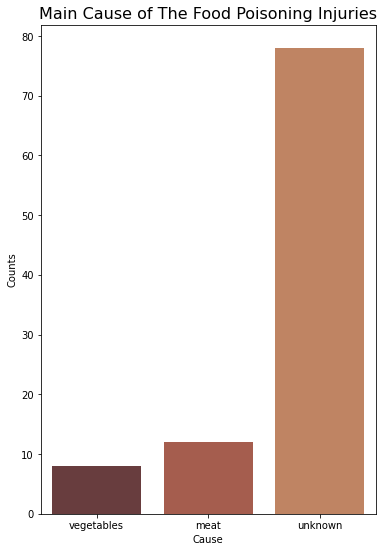

In [12]:
# Grouping the data by the 'Cause' column using the groupby() method, then uses the size() method to get the total number of data
causes_count = df.groupby(['Cause']).size().sort_values(ascending=True)[:3]
plt.figure(figsize=(6,9))
color = ['#6F3637','#B35340','#CE8054']

#Creating a bar plot using Seaborn Lib as imported above
splot = sns.barplot(x=causes_count.index, y=causes_count.values, palette=color)

# Set the x-axis label, y-axis label and the title of the plot
plt.xlabel("Cause")
plt.ylabel("Counts")
plt.title('Main Cause of The Food Poisoning Injuries', fontsize = 16)
    
# Let the magic happen
plt.show()


This code will create a bar plot of the **main causes of food poisoning injuries** from the data in the dataframe.
> showing the counts of each cause on the y-axis and the causes on the x-axis, with custom colors on the bars. 

In [13]:
# Describe Data Frame
df.describe()

,Time to Close,Claim Amount,Amount Paid,Individuals on Claim
count,98.000000,98.000000,98.000000,98.000000
mean,832.346939,122952.030612,58448.238571,4.908163
std,686.851131,166433.389040,87525.873849,7.292259
min,-57.000000,3555.000000,999.680000,0.000000
25%,340.750000,40000.000000,15965.642500,1.000000
50%,638.500000,58454.500000,29451.040000,2.000000
75%,1138.750000,136573.250000,52114.760000,5.750000
max,3591.000000,936540.000000,558725.770000,41.000000


# 1. How does the number of claims differ across locations?

In [14]:
# We can try to groups the data by 'Location' column, and then uses the sum() method to get the total number of individuals on claim for each group

location_claims = df.groupby('Location')['Individuals on Claim'].sum().sort_values(ascending=False)

# Sort is additional I just want to make it easier to see

# Display the result with loop that iterate over the location_claims dataframe

print("Total Number of Individuals on Claim by Location, Order By Highest to Lowest:")
for location, individuals in location_claims.items():
    print(f"{location}: {individuals} Individuals")

Total Number of Individuals on Claim by Location, Order By Highest to Lowest:
NATAL: 168 Individuals
SAO LUIS: 138 Individuals
RECIFE: 106 Individuals
FORTALEZA: 69 Individuals


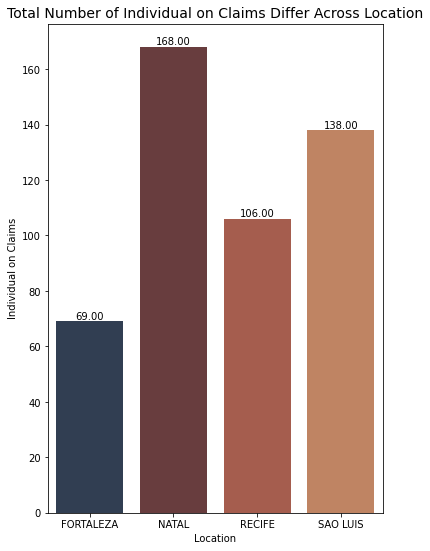

In [15]:
# Create plot figure and define the color
plt.figure(figsize=(6,9))
color = ['#2B3D58','#6F3637','#B35340','#CE8054']

# Group data by 'Location' column and sum values in 'Individuals on Claim' column
location_claims = df.groupby('Location')['Individuals on Claim'].sum().sort_values(ascending=True)
# Sort is additional i just want to make it easier to see 
location_claims = location_claims.sort_index()
ax = sns.barplot(x = location_claims.index,
                 y = location_claims.values, palette=color)
plt.xlabel("Location")
plt.ylabel("Individual on Claims")
plt.title('Total Number of Individual on Claims Differ Across Location', fontsize = 14)

# Add the values of each bar on the plot
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Let the magic happen
plt.show()

# 2. What is the distribution of time to close claims?
There are various time to close between one claim and another. The most common time, it tooks around 0-500 days from someone make a claim until the claim has solved. A kernel density estimate (KDE) plot is a method i chose for visualizing the distribution of observations. KDE represents the distribution of time to close claims as shown below :

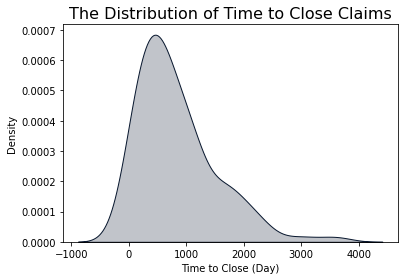

In [16]:
# Creating KDE Plot (Kernel Density Estimate) 
plt.figure(figsize=(6,4))
sns.kdeplot(data=df['Time to Close'], shade=True, color='#08172E')
plt.xlabel("Time to Close (Day)")
plt.ylabel("Density")
plt.title('The Distribution of Time to Close Claims', fontsize = 16)

# Let The Magic Happen
plt.show()

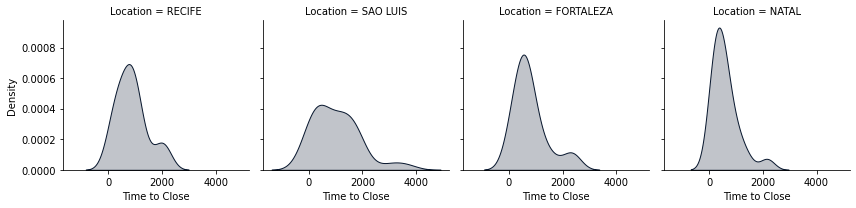

In [17]:
# Create a facet grid with 'Location' as the column variable
g = sns.FacetGrid(df, col="Location")

# Use kdeplot to plot 'Time to Close' for each location
g.map_dataframe(sns.kdeplot, x="Time to Close",shade=True, color='#08172E')

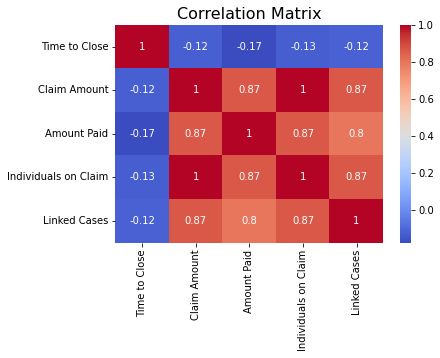

In [18]:
plt.figure(figsize=(6,4))

# Create a heatmap of the correlation matrix for the dataframe
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

plt.title('Correlation Matrix', fontsize = 16)

# Let the magic happen
plt.show()

> If the intersection of two variables on the heatmap is blue, then there is a weak correlation or no correlation between the two variables. If the intersection is red, then there is a strong correlation between the two variables.

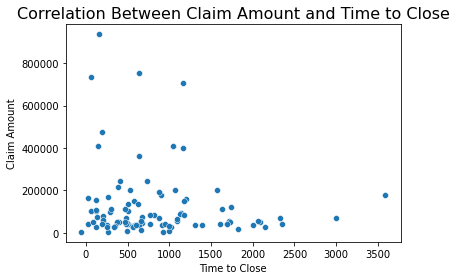

In [19]:
plt.figure(figsize=(6,4))

# Creating Scatterplot
sns.scatterplot(data=df, x="Time to Close", y="Claim Amount")
plt.xlabel("Time to Close")
plt.ylabel("Claim Amount")
plt.title('Correlation Between Claim Amount and Time to Close', fontsize = 16)

# Show
plt.show()

> There is no correlation between the Claim Amount and Time to Close variables, as evidenced by the scatterplot showing no clear relationship between the two variables.

> The legal team should focus on locations with the highest individual claims and prioritize increasing the efficiency of their claim examination to reduce the time to close claims. Further analysis should be conducted to identify the cause of the higher individual claims in certain locations.

In [20]:
# Identifying locations with higher individual claims 
total_claim = df.groupby(['Location'])[['Claim Amount','Amount Paid']].agg({'Claim Amount':'mean','Amount Paid':'mean'})

In [21]:
# Identifying locations with higher overall claims 
avg_claim = df.groupby(['Location'])[['Claim Amount','Amount Paid']].agg({'Claim Amount':'sum','Amount Paid':'sum'}).reset_index()

In [22]:
# merging the total_claim and avg_claim dataframes, resetting the index, and then merging the dataframes on the Location column, which can help to identify locations with higher individual and overall claims

claims = pd.merge(total_claim.reset_index(), avg_claim.reset_index(), left_on='Location', right_on='Location')
claims.rename({'Claim Amount_x': 'Average Claim Amount', 'Amount Paid_x': 'Average Amount Paid', 'Claim Amount_y': 'Total Claim Amount', 'Amount Paid_y': 'Total Amount Paid'}, axis=1, inplace=True)

In [23]:
claims

,Location,Average Claim Amount,Average Amount Paid,index,Total Claim Amount,Total Amount Paid
0,FORTALEZA,82977.545455,39592.800909,0,1825506,871041.62
1,NATAL,192628.238095,88489.724762,1,4045193,1858284.22
2,RECIFE,107534.960000,46366.108000,2,2688374,1159152.70
3,SAO LUIS,116340.866667,61314.961333,3,3490226,1839448.84


# 3. How does the average time to close claims differ by location?

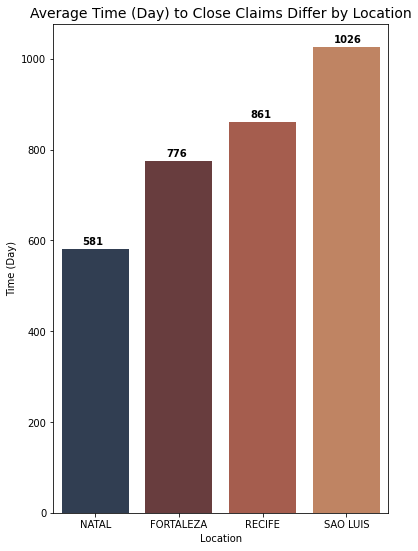

In [24]:
plt.figure(figsize=(6,9))
color = ['#2B3D58','#6F3637','#B35340','#CE8054']

# Group data by 'Location' column and find mean of 'Time to Close' column
location_mean = df.groupby('Location')['Time to Close'].mean().sort_values(ascending=True)

# Create a bar plot with location names on x-axis and average time to close on y-axis
bx = sns.barplot(x = location_mean.index, y = location_mean.values, palette=color)
plt.xlabel("Location")
plt.ylabel("Time (Day)")
plt.title('Average Time (Day) to Close Claims Differ by Location', fontsize = 14)

# Add the values of each bar on the plot 
for i, v in enumerate(location_mean.values):
    plt.text(i-0.15, v + 10, str(round(v)), color='black', fontweight='bold')
    
# Show
plt.show()

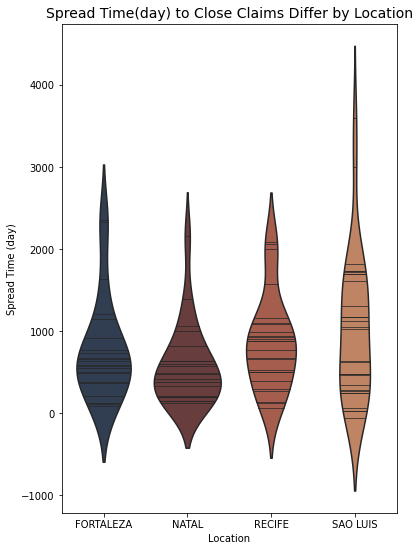

In [25]:
plt.figure(figsize=(6,9))
color = ['#2B3D58','#6F3637','#B35340','#CE8054']

# Create a violin plot with location on x-axis and 'Time to Close' on y-axis
sns.violinplot(x="Location", y='Time to Close', data = df, inner="stick", order = sorted(df["Location"].unique()),palette=color)

plt.xlabel("Location")
plt.ylabel("Spread Time (day)")
plt.title('Spread Time(day) to Close Claims Differ by Location', fontsize = 14)

# Show
plt.show()

The violin plot shows that Sao Luis has a wide range and high variance of time to close claims, it may indicate that there are underlying factors that contribute to the delay in closing claims. The legal team and Vivendo fast food company should investigate further to understand the cause of this variability and take action to improve the claims process in Sao Luis in order to reduce the time taken to close claims and ensure consistency.

In summary, my analysis shows that the number of claims for food poisoning injuries differs across locations. Specifically,

> Natal has the highest number of claims, followed by Sao Luis, Recife, and Fortaleza with the least number of claims. 

It is recommended that the legal team allocates more resources to handle the high volume of claims in **Natal and Sao Luis**. Additionally, the company should investigate the reasons for the high number of claims in Sao Luis, in order to take appropriate actions to mitigate the number of claims and improve the overall effectiveness of the legal team. 

In this way, the company can ensure that it is properly addressing customer complaints and concerns, and taking appropriate measures to prevent future claims.